# Multiclass Classification of Online Articles
## **Code part** of the case study on using NLP techniques alongside with Machine Learning Alrorithms to classify news into categories

In this notebook we, will put all the code of the application of the algorithms of machine learning that we used to classify the news dataset, we used, alongside with the application of text vectorisation. There will be several parts in the notebook. 




# PHASE 1 : DATA LOADING AND DESCRIPTION



We used the dataset **news-category-dataset** from **Kaggle**, that contains almost 125,000 news from the past 5 years
obtained from **HuffPost** online website. News in these datasets belong to 31 different topics (labels). Each news record consists of several attributes from which we are using only ‘Category’, ‘Headline’ and ‘Short description’ in our analysis, though we may use also ‘Author’, but it's not recommended. In addition, we combine data attributes ‘Headline’ and ‘Short description’ into the single attribute ‘Text’ as the input data for classification.




Also we should note that we used **Google Colaboratory** for the entire cycle of the development of the code, because off the performance and speed it offers, in term of the data loading, computation and ease of use.


**What is Colaboratory?**\
Colaboratory, often shortened **Colab**, allows Users to describe and perform Python code in the browser, with

- No configuration required
- Free GPU Access
- Easy sharing


To load our data,  will use the **Kaggle API**, but we need a key, witch will be provided with this notebook, if you don't have one.\

**Please upload the key *Kaggle.json* to your Colab environment files before executing any code bellow**

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#! kaggle datasets list
! kaggle datasets download -d rmisra/news-category-dataset
! unzip news-category-dataset.zip 

mkdir: cannot create directory ‘/root/.kaggle’: File exists
news-category-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  news-category-dataset.zip
replace News_Category_Dataset_v2.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


Before we do any execuion we need to import some libraries.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Now we load the data to manipulate it with the code.


In [ ]:
news_data = pd.read_json('./News_Category_Dataset_v2.json',  lines=True)

print(news_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB
None


As we see in the description there are about 200K rows and 6 columns, so for this exercise we will build a classifier with only the columns **headline** and **short_description** , since our to predict variable is **category**.

In [ ]:
t=news_data.category.unique()
print(len(t))
news_data.category.unique()

41


array(['CRIME', 'ENTERTAINMENT', 'WORLD NEWS', 'IMPACT', 'POLITICS',
       'WEIRD NEWS', 'BLACK VOICES', 'WOMEN', 'COMEDY', 'QUEER VOICES',
       'SPORTS', 'BUSINESS', 'TRAVEL', 'MEDIA', 'TECH', 'RELIGION',
       'SCIENCE', 'LATINO VOICES', 'EDUCATION', 'COLLEGE', 'PARENTS',
       'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE', 'HEALTHY LIVING',
       'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST', 'FIFTY', 'ARTS',
       'WELLNESS', 'PARENTING', 'HOME & LIVING', 'STYLE & BEAUTY',
       'DIVORCE', 'WEDDINGS', 'FOOD & DRINK', 'MONEY', 'ENVIRONMENT',
       'CULTURE & ARTS'], dtype=object)

There are 41 category of new, that a lot of classes.

### Examining the categories

In [ ]:
category_count = news_data['category'].value_counts()
print(category_count)

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
WORLDPOST          2579
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, 

[Text(0, 0, 'ARTS'),
 Text(0, 0, 'ARTS & CULTURE'),
 Text(0, 0, 'BLACK VOICES'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COLLEGE'),
 Text(0, 0, 'COMEDY'),
 Text(0, 0, 'CRIME'),
 Text(0, 0, 'CULTURE & ARTS'),
 Text(0, 0, 'DIVORCE'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'ENVIRONMENT'),
 Text(0, 0, 'FIFTY'),
 Text(0, 0, 'FOOD & DRINK'),
 Text(0, 0, 'GOOD NEWS'),
 Text(0, 0, 'GREEN'),
 Text(0, 0, 'HEALTHY LIVING'),
 Text(0, 0, 'HOME & LIVING'),
 Text(0, 0, 'IMPACT'),
 Text(0, 0, 'LATINO VOICES'),
 Text(0, 0, 'MEDIA'),
 Text(0, 0, 'MONEY'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PARENTS'),
 Text(0, 0, 'POLITICS'),
 Text(0, 0, 'QUEER VOICES'),
 Text(0, 0, 'RELIGION'),
 Text(0, 0, 'SCIENCE'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'STYLE'),
 Text(0, 0, 'STYLE & BEAUTY'),
 Text(0, 0, 'TASTE'),
 Text(0, 0, 'TECH'),
 Text(0, 0, 'THE WORLDPOST'),
 Text(0, 0, 'TRAVEL'),
 Text(0, 0, 'WEDDINGS'),
 Text(0, 0, 'WEIRD NEWS'),
 Text(0, 0, 'WELLNESS'),
 Text(0, 0, 'WOMEN'),
 Text

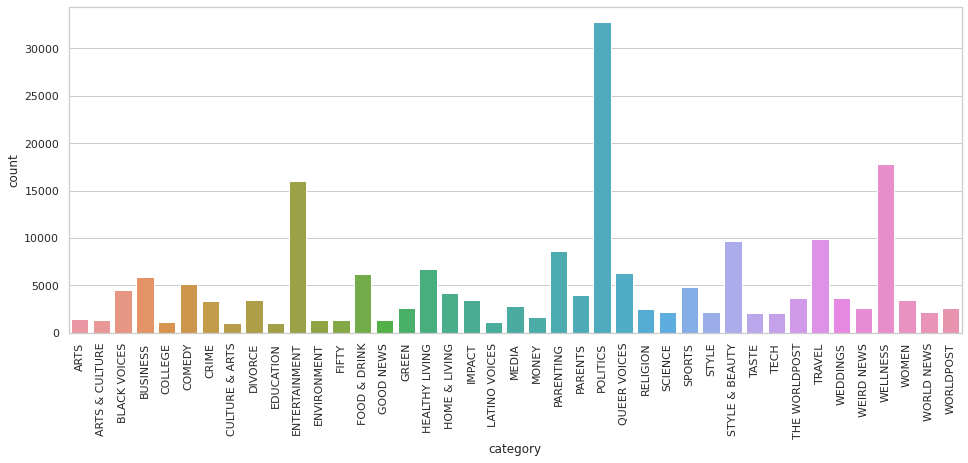

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

counts = news_data['category'].value_counts().sort_index()#.to_frame()
counts = pd.DataFrame(counts)
counts.columns = ['count']
counts['category'] = counts.index 
counts.reset_index(drop=True, inplace=True)
news_data.reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
g = sns.barplot(x='category', y='count', data=counts, )
g.set_xticklabels(g.get_xticklabels(), rotation=90, )
#t

We can see there is a big data inbalance between the categories. Let's order by the number of the news articles by each category

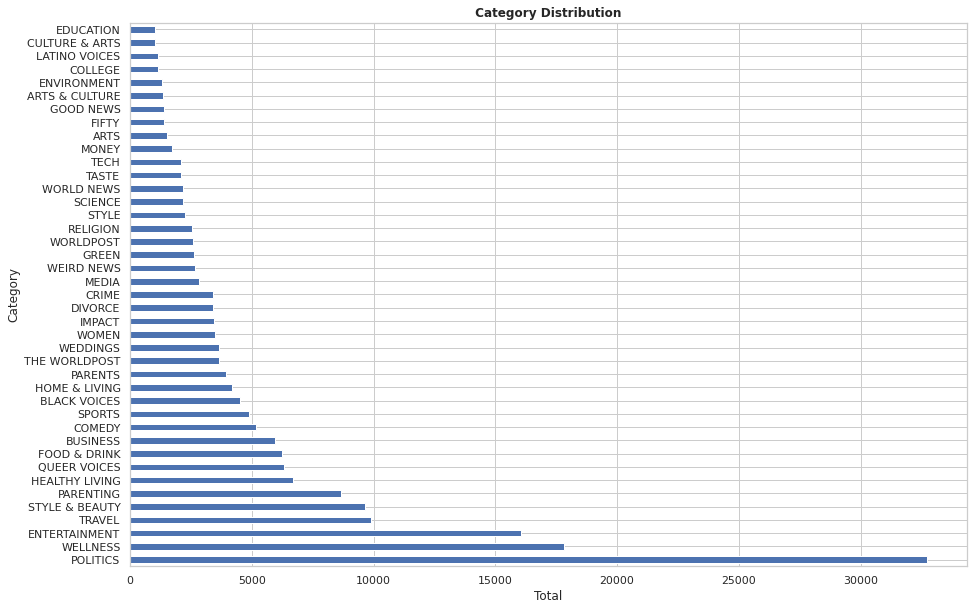

In [ ]:
news_data['category'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Category")
plt.title(" Category Distribution ",fontweight="bold", size=12);

# PHASE 2 : DATA PREPROCESSING


To make the data useful, we need to do some data manipulation.

However we need to merge  the categories that have the same meaning. 
Because less catergories mean better classification. 

We can see that we have inbalanced classes of the **Category** lables that we choose, so in order to perfome a meaningfull classification we have to over come this situation.

Also we have some *Catergories* that are redandents like : 

*   **ARTS & CULTURE** and  **CULTURE & ARTS**
*   **WORLDPOST** and **The WORLDPOST**
*   ....




Also we have to merge the redandant classes, cause it only cuasing us noise, the less classes we have to better.

## Data Merging

In [ ]:
news_data.loc[news_data.category == "CULTURE & ARTS", "category"] = "ARTS & CULTURE"
news_data.loc[news_data.category == "THE WORLDPOST", "category"] = "WORLDPOST"

news_data['category'].value_counts().sort_index()

ARTS               1509
ARTS & CULTURE     2369
BLACK VOICES       4528
BUSINESS           5937
COLLEGE            1144
COMEDY             5175
CRIME              3405
DIVORCE            3426
EDUCATION          1004
ENTERTAINMENT     16058
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       6226
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTING          8677
PARENTS            3955
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE              2254
STYLE & BEAUTY     9649
TASTE              2096
TECH               2082
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         2177
WORLDPOST          6243
Name: category, dtype: int64

We need to merge the rest also


In [ ]:
news_data.loc[news_data.category == "PARENTING", "category"] = "PARENTS"
news_data.loc[news_data.category == "COMEDY", "category"] = "ENTERTAINMENT"
news_data.loc[news_data.category == "STYLE", "category"] = "STYLE & BEAUTY"
news_data.loc[news_data.category == "COLLEGE", "category"] = "EDUCATION"
news_data.loc[news_data.category == "TASTE", "category"] = "FOOD & DRINK"
news_data.loc[news_data.category == "ARTS", "category"] = "ARTS & CULTURE"
news_data.loc[news_data.category == "WORLDPOST", "category"] = "WORLD NEWS"
news_data['category'].value_counts().sort_index()

ARTS & CULTURE     3878
BLACK VOICES       4528
BUSINESS           5937
CRIME              3405
DIVORCE            3426
EDUCATION          2148
ENTERTAINMENT     21233
ENVIRONMENT        1323
FIFTY              1401
FOOD & DRINK       8322
GOOD NEWS          1398
GREEN              2622
HEALTHY LIVING     6694
HOME & LIVING      4195
IMPACT             3459
LATINO VOICES      1129
MEDIA              2815
MONEY              1707
PARENTS           12632
POLITICS          32739
QUEER VOICES       6314
RELIGION           2556
SCIENCE            2178
SPORTS             4884
STYLE & BEAUTY    11903
TECH               2082
TRAVEL             9887
WEDDINGS           3651
WEIRD NEWS         2670
WELLNESS          17827
WOMEN              3490
WORLD NEWS         8420
Name: category, dtype: int64

In [ ]:
t=news_data.category.unique()
print('Number of categories after merging ', len(t))

Number of categories after merging  32


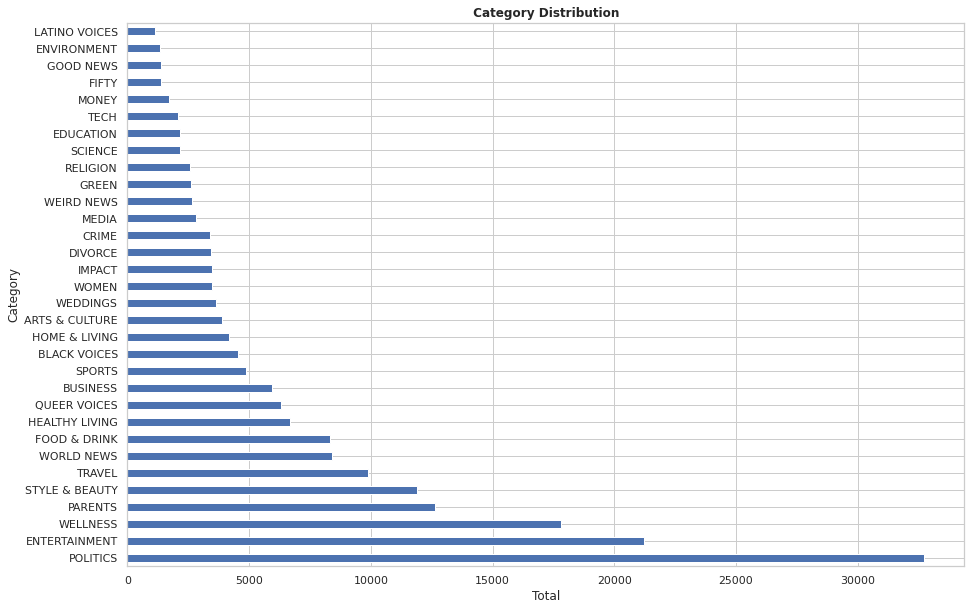

In [ ]:
news_data['category'].value_counts().plot(kind='barh', figsize=(15,10))
plt.xlabel("Total")
plt.ylabel("Category")
plt.title(" Category Distribution ",fontweight="bold", size=12);

Even though we merged some categories, we still have a huge inbalance, in the data.

anyway, now we have just 29 categories to work with less classes, we will increase the occuracy of the models



## Handling Null Values

In [ ]:
  news_data.isnull().sum()
  

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

We may have, some null values, we may need to drop them.

In [ ]:
news_data = news_data.dropna()
news_data.isnull().sum()

category             0
headline             0
authors              0
link                 0
short_description    0
date                 0
dtype: int64

## Preparing the Data Versions copies we gonna use

Here we may have different ways to do it for each case, so we will have different spits and we will test them all.\
The goal is to overcome two chalanges :

1.   Data imbalance.
2.   Increase performence.

And we will prepare the traing and testing, by buiding different datasets.



### Enumerate the classes labels

We will add a **label** column that will help us to split the data, and have fast comparison.\
We will enumerate the category column of the dataset

In [ ]:
possible_labels = news_data.category.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
  
reverse_label_dict = {v: k for k, v in label_dict.items()}
print(label_dict, reverse_label_dict)


{'CRIME': 0, 'ENTERTAINMENT': 1, 'WORLD NEWS': 2, 'IMPACT': 3, 'POLITICS': 4, 'WEIRD NEWS': 5, 'BLACK VOICES': 6, 'WOMEN': 7, 'QUEER VOICES': 8, 'SPORTS': 9, 'BUSINESS': 10, 'TRAVEL': 11, 'MEDIA': 12, 'TECH': 13, 'RELIGION': 14, 'SCIENCE': 15, 'LATINO VOICES': 16, 'EDUCATION': 17, 'PARENTS': 18, 'ARTS & CULTURE': 19, 'STYLE & BEAUTY': 20, 'GREEN': 21, 'FOOD & DRINK': 22, 'HEALTHY LIVING': 23, 'GOOD NEWS': 24, 'FIFTY': 25, 'WELLNESS': 26, 'HOME & LIVING': 27, 'DIVORCE': 28, 'WEDDINGS': 29, 'MONEY': 30, 'ENVIRONMENT': 31} {0: 'CRIME', 1: 'ENTERTAINMENT', 2: 'WORLD NEWS', 3: 'IMPACT', 4: 'POLITICS', 5: 'WEIRD NEWS', 6: 'BLACK VOICES', 7: 'WOMEN', 8: 'QUEER VOICES', 9: 'SPORTS', 10: 'BUSINESS', 11: 'TRAVEL', 12: 'MEDIA', 13: 'TECH', 14: 'RELIGION', 15: 'SCIENCE', 16: 'LATINO VOICES', 17: 'EDUCATION', 18: 'PARENTS', 19: 'ARTS & CULTURE', 20: 'STYLE & BEAUTY', 21: 'GREEN', 22: 'FOOD & DRINK', 23: 'HEALTHY LIVING', 24: 'GOOD NEWS', 25: 'FIFTY', 26: 'WELLNESS', 27: 'HOME & LIVING', 28: 'DIVORC

In [ ]:
news_data['label'] = news_data.category.replace(label_dict)

#### CASE ONE : **news_data_case_1** 
####Merging some columns : **headline**, **short_description**, **authors**



We will prepare a dataset with combining the columns **headline** with **short_description** and **authors** into a new column. The goal is to increase the performence by merging some columns.


In [ ]:
news_data_case_1 = news_data.copy()
news_data_case_1['information']  = news_data_case_1[['headline', 'short_description']].apply(lambda x: ' '.join(x), axis=1)

We keep in these dataset copies only usefull data that we gonna need for the training and testing. 

In [ ]:
cols = ['category', 'information', 'label']
news_data_case_1=news_data_case_1[cols]
print(news_data_case_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200853 entries, 0 to 200852
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     200853 non-null  object
 1   information  200853 non-null  object
 2   label        200853 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.1+ MB
None


In [ ]:
news_data_case_1.head()

,category,information,label
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,0
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,1
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...,1
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,1
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,1


#### CASE TWO : **news_data_case_2**
####counter the data imbalance by **undersampling** and using column **headline**

**In this case we will counter the data imbalance.** \

For this problem, we have three methodes to fix, we can undersample or oversample or generate synthetique data, but because we deal with text dataset we really can't oversample the samller classer, because we don't want to just duplicate the text we have, or even generate fake text. The smallest class is **Education**  with 1000 example, compared the rest, compared to **Politics** with over 30000 example, we can see that i will be hard to do a classification with such disparity of data. So we can not really undersample to the lowest level of the smallest categrory of *Education*, nor work with full *politic* example, we have to find a compromize. we may try first with an equal number of categories in the training and use the rest in testing.

We can start by constracting a dataset with equal examples first.

In [ ]:
min  = counts['count'].argmin()
print('smallest class', counts.iloc[min, : ] )

smallest class count            1004
category    EDUCATION
Name: 9, dtype: object


In this case, we will have a dataset of 1000 line by each category.

In [ ]:
news_data_case_2 = news_data.head(0)
news_data_case_2_rest = news_data.head(0)

for category in counts['category']:
  #df2 = df2.append( df[df['category']==category].head(1000))
  news_data_case_2 = news_data_case_2.append( news_data[news_data['category']==category].iloc[0:1000, :])
  news_data_case_2_rest = news_data_case_2_rest.append( news_data[news_data['category']==category].iloc[1000:, :])

print('shapes of datasets', news_data_case_2.shape ,news_data_case_2_rest.shape)
#df.shape

shapes of datasets (32000, 7) (168853, 7)


In [ ]:
news_data_case_2['information']  = news_data_case_2[['headline', 'short_description']].apply(lambda x: ' '.join(x), axis=1)
#news_data_case_2 = news_data_case_2.rename(columns={'headline': 'information'})
cols = ['category', 'information', 'label']
news_data_case_2=news_data_case_2[cols]
print(news_data_case_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32000 entries, 6715 to 14228
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     32000 non-null  object
 1   information  32000 non-null  object
 2   label        32000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1000.0+ KB
None


In [ ]:
news_data_case_2.head()

,category,information,label
6715,ARTS & CULTURE,Modeling Agencies Enabled Sexual Predators For...,19
7426,ARTS & CULTURE,Actor Jeff Hiller Talks “Bright Colors And Bol...,19
7698,ARTS & CULTURE,New Yorker Cover Puts Trump 'In The Hole' Afte...,19
7744,ARTS & CULTURE,J. K. Rowling Trolls Trump For Canceled UK Vis...,19
7928,ARTS & CULTURE,Man Surprises Girlfriend By Drawing Them In Di...,19


In [ ]:
news_data_case_2_rest['information']  = news_data_case_2_rest[['headline', 'short_description']].apply(lambda x: ' '.join(x), axis=1)
#news_data_case_2_rest = news_data_case_2_rest.rename(columns={'headline': 'information'})
cols = ['category', 'information', 'label']
news_data_case_2_rest=news_data_case_2_rest[cols]
print(news_data_case_2_rest.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168853 entries, 57523 to 124973
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   category     168853 non-null  object
 1   information  168853 non-null  object
 2   label        168853 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.2+ MB
None


In [ ]:
news_data_case_2_rest.head()

,category,information,label
57523,ARTS & CULTURE,Contemporary Art ™ is a Now a 'Brand',19
57526,ARTS & CULTURE,Loose Lips Sink Ships,19
57569,ARTS & CULTURE,Ethereal Photos Show Just How Neat Whisky Dreg...,19
57678,ARTS & CULTURE,Artist JR Makes The Louvre's Iconic Pyramid Di...,19
57719,ARTS & CULTURE,"In 'Barge,' Unsung Heroes Follow The American ...",19


#### Spliting the data

The split size and randomness will be left for each model, as a parameter.\
We will not specify a certain split. The quality of the model may depend on the split so we suppose to have the optimal split for each model.

# PHASE 3 : MODELS DEPLOYMENT AND PERORMANCE


General imports that we will use for all models

In [ ]:
from sklearn.model_selection import train_test_split
!mkdir models_pred

mkdir: cannot create directory ‘models_pred’: File exists


## CASE 1 : MODELS PERFORMENCES


### CASE 1 with **GENERIC MODELS**

#### Train Test Split


In [ ]:
X_case_1 = news_data_case_1.information
y_case_1 = news_data_case_1.category

train_size_case_1_split_1 = 0.7
random_seed = 1
#split
from sklearn.model_selection import train_test_split
X_train_case_1_split_1, X_test_case_1_split_1, y_train_case_1_split_1, y_test_case_1_split_1 = train_test_split(X_case_1, y_case_1, 
                                                                                                                train_size =train_size_case_1_split_1, 
                                                                                                                random_state = random_seed)


print(X_train_case_1_split_1)
print(y_train_case_1_split_1)

88632     Democratic Congressman: Why Is Bernie Sanders ...
190184    Couple Who Tried To Sell Rosetta Stone On eBay...
51685     You've Never Heard A Radiohead Mix Like This B...
146792    Florida District Bans School-Issued Cheerleadi...
33728     Pope Francis Has Harsh Words For People Who Te...
                                ...                        
73349     6-year-old Boy Stuck In 50-foot Tree “He was j...
109259    How to Complain to the Boss A short, concise e...
50057     An Olympian Barely Missed Out On Gold And Gave...
5192      Cops And Educators Agree: Arming Teachers Is A...
128037    Who Protects the People Once Their Water's Bee...
Name: information, Length: 140597, dtype: object
88632          POLITICS
190184            MONEY
51685     ENTERTAINMENT
146792          PARENTS
33728      FOOD & DRINK
              ...      
73349        WEIRD NEWS
109259         BUSINESS
50057            SPORTS
5192           POLITICS
128037      ENVIRONMENT
Name: category, Length: 140

#### Creating the Bag of Words Representation




In this step we will create the words embeddings for that we gonna use for the classical machine learning model, that we learned at the class.

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = 'english')

In the case of the classical models we gonna use only a **Frequency Based Embedding** 

In [ ]:

vec.fit(X_train_case_1_split_1)

print(len(vec.get_feature_names()))
vec.vocabulary_

74666


{'democratic': 17969,
 'congressman': 14729,
 'bernie': 7404,
 'sanders': 57916,
 'silent': 60611,
 'immigration': 32665,
 'couple': 15667,
 'tried': 68175,
 'sell': 59204,
 'rosetta': 57011,
 'stone': 63625,
 'ebay': 21044,
 'pay': 49226,
 'headstone': 30222,
 'accused': 1816,
 'piracy': 50512,
 'ongoing': 47233,
 'dialogue': 18696,
 'parties': 48934,
 'involved': 34202,
 'particular': 48925,
 'case': 11492,
 'potentially': 51518,
 'resolve': 55738,
 'issue': 34472,
 've': 70746,
 'heard': 30270,
 'radiohead': 53606,
 'mix': 43336,
 'like': 38811,
 'thom': 66668,
 'yorke': 74066,
 'says': 58269,
 'puts': 53097,
 'sleep': 61161,
 'florida': 25223,
 'district': 19552,
 'bans': 6233,
 'school': 58548,
 'issued': 34473,
 'cheerleading': 12474,
 'uniforms': 69656,
 'worn': 73439,
 'class': 13310,
 'uniform': 69652,
 'swimsuit': 65080,
 'swim': 65074,
 'team': 65916,
 'wrestling': 73548,
 'aren': 4449,
 'allowed': 3110,
 'wear': 72181,
 'pope': 51277,
 'francis': 25894,
 'harsh': 29927,
 'w

In [ ]:
# another way of representing the features
X_train_transformed_case_1_split_1 = vec.transform(X_train_case_1_split_1)
X_train_transformed_case_1_split_1

<140597x74666 sparse matrix of type '<class 'numpy.int64'>'
	with 2105510 stored elements in Compressed Sparse Row format>

In [ ]:
print(X_train_transformed_case_1_split_1.shape)
type(X_train_transformed_case_1_split_1)

(140597, 74666)


scipy.sparse.csr.csr_matrix

In [ ]:
# for test data
X_test_transformed_case_1_split_1 = vec.transform(X_test_case_1_split_1)
X_test_transformed_case_1_split_1

<60256x74666 sparse matrix of type '<class 'numpy.int64'>'
	with 889863 stored elements in Compressed Sparse Row format>

**Be careful and sure each time you train models, they may take a lot of time**

#### **LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=1000)
logit.fit(X_train_transformed_case_1_split_1, y_train_case_1_split_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

# predict class
y_pred_class_case_1_split_1_reg_log = logit.predict(X_test_transformed_case_1_split_1)

# predict probabilities
y_pred_proba = logit.predict_proba(X_test_transformed_case_1_split_1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_case_1_split_1, y_pred_class_case_1_split_1_reg_log))

                precision    recall  f1-score   support

ARTS & CULTURE       0.57      0.46      0.51      1139
  BLACK VOICES       0.50      0.39      0.44      1366
      BUSINESS       0.48      0.47      0.48      1785
         CRIME       0.57      0.53      0.55      1009
       DIVORCE       0.82      0.69      0.75      1042
     EDUCATION       0.47      0.38      0.42       629
 ENTERTAINMENT       0.61      0.75      0.67      6352
   ENVIRONMENT       0.58      0.29      0.39       391
         FIFTY       0.33      0.18      0.24       414
  FOOD & DRINK       0.73      0.78      0.76      2425
     GOOD NEWS       0.39      0.23      0.29       414
         GREEN       0.42      0.33      0.37       802
HEALTHY LIVING       0.33      0.34      0.34      1999
 HOME & LIVING       0.76      0.70      0.73      1267
        IMPACT       0.39      0.29      0.33      1068
 LATINO VOICES       0.55      0.26      0.36       336
         MEDIA       0.54      0.41      0.47  

In [ ]:
d = {'pred':y_pred_class_case_1_split_1_reg_log, 'true': y_test_case_1_split_1}
pred_class_case_1_split_1_reg_log  = pd.DataFrame(d)

pred_class_case_1_split_1_reg_log.to_csv('models_pred/pred_class_case_1_split_1_reg_log.csv')


#### **NAIVE BAYSE**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_transformed_case_1_split_1, y_train_case_1_split_1)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# fit
#nb.fit(X_transformed,y_train)

# predict class
y_pred_class_case_1_split_1_nb = nb.predict(X_test_transformed_case_1_split_1)

# predict probabilities
y_pred_proba = nb.predict_proba(X_test_transformed_case_1_split_1)

In [ ]:
print(classification_report(y_test_case_1_split_1, y_pred_class_case_1_split_1_nb))

                precision    recall  f1-score   support

ARTS & CULTURE       0.74      0.25      0.37      1139
  BLACK VOICES       0.61      0.18      0.27      1366
      BUSINESS       0.51      0.39      0.44      1785
         CRIME       0.61      0.49      0.55      1009
       DIVORCE       0.86      0.46      0.60      1042
     EDUCATION       0.58      0.11      0.18       629
 ENTERTAINMENT       0.56      0.76      0.65      6352
   ENVIRONMENT       0.87      0.08      0.15       391
         FIFTY       0.67      0.00      0.01       414
  FOOD & DRINK       0.75      0.78      0.76      2425
     GOOD NEWS       0.56      0.01      0.02       414
         GREEN       0.52      0.15      0.23       802
HEALTHY LIVING       0.56      0.05      0.10      1999
 HOME & LIVING       0.85      0.52      0.64      1267
        IMPACT       0.54      0.13      0.21      1068
 LATINO VOICES       0.67      0.01      0.02       336
         MEDIA       0.76      0.11      0.20  

In [ ]:
d = {'pred':y_pred_class_case_1_split_1_nb, 'true': y_test_case_1_split_1}
pred_class_case_1_split_1_nb  = pd.DataFrame(d)

pred_class_case_1_split_1_nb.to_csv('models_pred/pred_class_case_1_split_1_nb.csv')


#### **SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_transformed_case_1_split_1, y_train_case_1_split_1)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:

# predict class
y_pred_class_case_1_split_1_svm = svm.predict(X_test_transformed_case_1_split_1)

# predict probabilities


In [ ]:
print(classification_report(y_test_case_1_split_1, y_pred_class_case_1_split_1_svm))

                precision    recall  f1-score   support

ARTS & CULTURE       0.49      0.42      0.45      1139
  BLACK VOICES       0.42      0.38      0.40      1366
      BUSINESS       0.41      0.40      0.40      1785
         CRIME       0.49      0.49      0.49      1009
       DIVORCE       0.74      0.69      0.71      1042
     EDUCATION       0.34      0.33      0.33       629
 ENTERTAINMENT       0.63      0.67      0.65      6352
   ENVIRONMENT       0.40      0.26      0.31       391
         FIFTY       0.24      0.20      0.22       414
  FOOD & DRINK       0.70      0.74      0.72      2425
     GOOD NEWS       0.25      0.22      0.23       414
         GREEN       0.34      0.31      0.32       802
HEALTHY LIVING       0.28      0.30      0.29      1999
 HOME & LIVING       0.71      0.67      0.69      1267
        IMPACT       0.30      0.27      0.28      1068
 LATINO VOICES       0.42      0.31      0.36       336
         MEDIA       0.46      0.41      0.43  

In [ ]:
d = {'pred':y_pred_class_case_1_split_1_svm, 'true': y_test_case_1_split_1}
pred_class_case_1_split_1_svm  = pd.DataFrame(d)

pred_class_case_1_split_1_svm.to_csv('models_pred/pred_class_case_1_split_1_svm.csv')


#### **RANDOM FOREST**

**Please be carefull this models time a huge time to train, redo it only if you are sure**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_transformed_case_1_split_1, y_train_case_1_split_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_class_case_1_split_1_rf = rf.predict(X_test_transformed_case_1_split_1)
# predict probabilities


In [ ]:
print(classification_report(y_test_case_1_split_1, y_pred_class_case_1_split_1_rf))

                precision    recall  f1-score   support

ARTS & CULTURE       0.57      0.31      0.40      1139
  BLACK VOICES       0.55      0.22      0.31      1366
      BUSINESS       0.45      0.37      0.41      1785
         CRIME       0.49      0.44      0.47      1009
       DIVORCE       0.85      0.60      0.70      1042
     EDUCATION       0.41      0.35      0.37       629
 ENTERTAINMENT       0.48      0.72      0.57      6352
   ENVIRONMENT       0.95      0.11      0.19       391
         FIFTY       0.39      0.05      0.09       414
  FOOD & DRINK       0.61      0.76      0.68      2425
     GOOD NEWS       0.30      0.03      0.06       414
         GREEN       0.44      0.20      0.27       802
HEALTHY LIVING       0.23      0.29      0.25      1999
 HOME & LIVING       0.75      0.56      0.64      1267
        IMPACT       0.45      0.08      0.14      1068
 LATINO VOICES       0.62      0.05      0.09       336
         MEDIA       0.57      0.22      0.32  

In [ ]:

d = {'pred':y_pred_class_case_1_split_1_rf, 'true': y_test_case_1_split_1}
pred_class_case_1_split_2_rf  = pd.DataFrame(d)

pred_class_case_1_split_2_rf.to_csv('models_pred/pred_class_case_1_split_1_rf.csv')


#### **BIDIRECTIONAL ENCODER REPRESENTATIONS FROM TRANSFORMERS**

In [ ]:
#to be done one time
!pip install transformers

     |████████████████████████████████| 890kB 4.6MB/s 
     |████████████████████████████████| 1.1MB 28.9MB/s 
     |████████████████████████████████| 3.0MB 42.7MB/s 
     |████████████████████████████████| 890kB 51.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=a87108282ac238d553c33714974d4312b6a2fae657e36fb47ba0415a4f8b4bcf
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
#utility class for the notebook manipulation
from tqdm.notebook import tqdm


import torch
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification


**BERT is very heavy in term of training  so it it necessary to use less data for traing or we gonna be stuck**

In [ ]:
from sklearn.model_selection import train_test_split

X_case_1_bert = news_data_case_1.information
y_case_1_bert = news_data_case_1.label

train_size_case_1_split_2 = 0.05#0.05
random_seed = 1
from sklearn.model_selection import train_test_split

X_train_case_1_split_2, X_test_case_1_split_2, y_train_case_1_split_2, y_test_case_1_split_2 = train_test_split(X_case_1_bert, y_case_1_bert, 
                                                                                                                train_size =train_size_case_1_split_2, 
                                                                                                                random_state = random_seed,
                                                                                                                #stratify=news_data_case_1.label.values
                                                                                                                )

print(X_case_1_bert.shape, y_case_1_bert.shape)
print(X_train_case_1_split_2.shape)
print(X_test_case_1_split_2.shape)

(200853,) (200853,)
(10042,)
(190811,)


Downsize the data fo testing code perposes.

In [ ]:
#X_test_case_1_split_2 = X_test_case_1_split_2[:100]
#y_test_case_1_split_2 = y_test_case_1_split_2[:100]
print(X_test_case_1_split_2.shape)

(190811,)


#### Creating Words embeddings


**For the BERT Model, we gonna use HUGGING FACE BERT MODEL THAT WAS ADOPTED FOR CALSIFICATION**\

The model take three inputs, with are constructed from the data usong special fucntions, 

This the case of BERT we gonna use **Prediction Based Embedding**

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

**The training time, and internal params of the model depend on the size of the input vector, so we need ot see how long are the input data, so we can see if it's feasible to do the trainning and also to optimze if possible**

In [ ]:
token_lens = []

for sentence in news_data_case_1.information.values:
  tokens = tokenizer.encode(sentence, max_length = 512, truncation=True)
  token_lens.append(len(tokens))



353


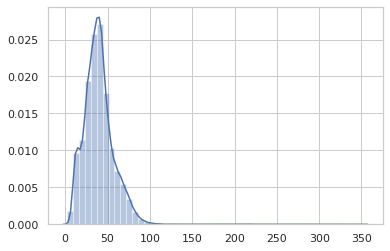

In [ ]:
sns.distplot(token_lens)
print(max(token_lens))

**So most of the input data encoding have a size around 50, so we gonna go with a maximum length of encoding size of 64**

In [ ]:
encoded_data_train_case_1_split_2 = tokenizer.batch_encode_plus(
    X_train_case_1_split_2.to_numpy(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=64, 
    return_tensors='pt',
    truncation=True
)




/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:

encoded_data_test_case_1_split_2 = tokenizer.batch_encode_plus(
    X_test_case_1_split_2.to_numpy(), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=64, 
    return_tensors='pt',
    truncation=True
)


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1770: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_train_case_1_split_2 = encoded_data_train_case_1_split_2['input_ids']
attention_masks_train__case_1_split_2 = encoded_data_train_case_1_split_2['attention_mask']
labels_train_case_1_split_2 = torch.tensor(y_train_case_1_split_2.to_numpy())

input_ids_test_case_1_split_2 = encoded_data_test_case_1_split_2['input_ids']
attention_masks_test_case_1_split_2 = encoded_data_test_case_1_split_2['attention_mask']
labels_test_case_1_split_2 = torch.tensor(y_test_case_1_split_2.to_numpy())


In [ ]:


print('all shapes training')
(input_ids_train_case_1_split_2.shape, attention_masks_train__case_1_split_2.shape, labels_train_case_1_split_2.shape)

all shapes training


(torch.Size([10042, 64]), torch.Size([10042, 64]), torch.Size([10042]))

In [ ]:

print('all shapes testing')
(input_ids_test_case_1_split_2.shape, attention_masks_test_case_1_split_2.shape, labels_test_case_1_split_2.shape)

all shapes testing


(torch.Size([190811, 64]), torch.Size([190811, 64]), torch.Size([190811]))

Now after encoding our data to 

In [ ]:
dataset_train_case_1_split_2 = TensorDataset(input_ids_train_case_1_split_2, attention_masks_train__case_1_split_2, labels_train_case_1_split_2)
dataset_test_case_1_split_2 = TensorDataset(input_ids_test_case_1_split_2, attention_masks_test_case_1_split_2, labels_test_case_1_split_2)

In [ ]:
len(dataset_train_case_1_split_2), len(dataset_test_case_1_split_2)

(10042, 190811)

After all the processingo the input data we got only 10k rows for training and 190k for testing, due to the max_lengh defined as 64

Finally we load bert model

In [ ]:
bert = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

The size of the model before we fine tuned is around 400 MB, so it's Big

The model in impliment in **PyTorch ML libeary**, so we use other tools from the same library to ease the training pahse on us, but using loader.

To fasten the training we gonna use a batch size of 10


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 10

dataloader_train_case_1_split_2 = DataLoader(dataset_train_case_1_split_2, 
                              sampler=RandomSampler(dataset_train_case_1_split_2), 
                              batch_size=batch_size)

dataloader_test_case_1_split_2 = DataLoader(dataset_test_case_1_split_2, 
                                   sampler=SequentialSampler(dataset_test_case_1_split_2), 
                                   batch_size=batch_size)

Afterward, the model is trained like a **Pytorch Model**.\
So gonna use the **AdamW** optimizer and learing rate of 0.00005.

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(bert.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

We gonna do 5 passage of the data in the training.

In [ ]:
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataset_train_case_1_split_2)*epochs)

TO get the performence repot we gonna define some functions

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

def get_final_prediction(preds ):
    preds_flat = np.argmax(preds, axis=1).flatten()
 
    return preds_flat


def accuracy_total(preds, labels):
    labels_flat = labels.flatten()
    true_pred = np.argwhere(preds_flat==labels_flat)

    print(f'Total accuracy : {len(true_pred)/len(labels_flat)}\n')

To reproduce approximatelly same results keep the **seed_val** as it is

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

Use the GPU computation fron Colab to get faster training. 

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
bert.to(device)

print(device)

cuda


In [ ]:
def evaluate(model, dataloader_test):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_test:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_test) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
!mkdir data_volume

In [ ]:
def train_bert(model, dataloader_train, dataloader_test):
    print('Training start!')

    for epoch in range(1, epochs+1):  # loop over the dataset multiple times
        tqdm.write(f'\nEpoch {epoch}')
        model.train()
        
        loss_train_total = 0
    
        for i, batch in enumerate(dataloader_train, 0):
            
            # zero the parameter gradients
            model.zero_grad()
            
            # get the inputs; data is a list of [inputs, labels]
            batch = tuple(b.to(device) for b in batch)

            inputs = {'input_ids':      batch[0],
                      'attention_mask': batch[1],
                      'labels':         batch[2],
                    }       

            outputs = model(**inputs)
            
            loss = outputs[0]
            # print statistics
            loss_train_total += loss.item()
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()

            if i % 500 == 499:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, loss.item() /len(batch)))
                


        torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
            
        
        
        loss_train_avg = loss_train_total/len(dataloader_train)            
        tqdm.write(f'Training loss: {loss_train_avg}')
        
        val_loss, predictions, true_vals = evaluate(model, dataloader_test)
        val_f1 = f1_score_func(predictions, true_vals)
        tqdm.write(f'Validation loss: {val_loss}')
        tqdm.write(f'F1 Score (Weighted): {val_f1}')

    print('Finished Training')

**PLEASE BUT SO CAREFULL WHEN YOU RUN THIS BECAUE IT TAKES A LOT OF TIME ... SO BEFORE SAVE THE LAST MODEL BEFORE YOUN TRAIN IT**


In [ ]:
train_bert(bert, dataloader_train_case_1_split_2, dataloader_test_case_1_split_2)

Training start!

Epoch 1
[2,   500] loss: 0.761
[2,  1000] loss: 0.544
Training loss: 2.2791504384866403
Validation loss: 1.6398587763893593
F1 Score (Weighted): 0.5461303962466982

Epoch 2
[3,   500] loss: 0.496
[3,  1000] loss: 0.416
Training loss: 1.395377671451711
Validation loss: 1.3755622646383752
F1 Score (Weighted): 0.6015524536215401

Epoch 3
[4,   500] loss: 0.362
[4,  1000] loss: 0.128
Training loss: 0.9976540357541682
Validation loss: 1.3172526564232372
F1 Score (Weighted): 0.6414390931240624

Epoch 4
[5,   500] loss: 0.231
[5,  1000] loss: 0.430
Training loss: 0.7243633302734859
Validation loss: 1.3253888486831922
F1 Score (Weighted): 0.6543136936277246

Epoch 5
[6,   500] loss: 0.194
[6,  1000] loss: 0.046
Training loss: 0.5239954631534678
Validation loss: 1.4088594731146085
F1 Score (Weighted): 0.6559394978308238
Finished Training


To not need to do the raining again we need to save the model in file system an dload it when we need to do prediction or even more trainin, the **Training function do save a copy of the model for each epoch**


**Let's load the model**

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

We load the last verison from the saved models

In [ ]:
model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_5.model', map_location=torch.device('cpu')))

<All keys matched successfully>

Let's do the prediction of the model on test data

**We have 0.95 of our data as test data because we want to train fast , but no difference beacuse, we validate with the same data of tests** \
**We can have thre splits to get one for the validation, but we want ot keep the same strcuture we did with the others models**

That's why it take a lot of time to get the predictions from the model.

In [ ]:
_, y_pred_class_case_1_split_2_bert, y_true_class_case_1_split_2_bert = evaluate(model, dataloader_test_case_1_split_2)

Let's get the accuracy by each category




In [ ]:
accuracy_per_class(y_pred_class_case_1_split_2_bert, y_true_class_case_1_split_2_bert)

Class: CRIME
Accuracy: 1918/3247

Class: ENTERTAINMENT
Accuracy: 15096/20247

Class: WORLD NEWS
Accuracy: 5818/7973

Class: IMPACT
Accuracy: 777/3308

Class: POLITICS
Accuracy: 24777/31089

Class: WEIRD NEWS
Accuracy: 633/2536

Class: BLACK VOICES
Accuracy: 1377/4272

Class: WOMEN
Accuracy: 1125/3321

Class: QUEER VOICES
Accuracy: 4117/5987

Class: SPORTS
Accuracy: 3063/4634

Class: BUSINESS
Accuracy: 3067/5619

Class: TRAVEL
Accuracy: 8080/9371

Class: MEDIA
Accuracy: 913/2685

Class: TECH
Accuracy: 1048/1958

Class: RELIGION
Accuracy: 1371/2411

Class: SCIENCE
Accuracy: 1210/2080

Class: LATINO VOICES
Accuracy: 104/1077

Class: EDUCATION
Accuracy: 1121/2018

Class: PARENTS
Accuracy: 8906/12044

Class: ARTS & CULTURE
Accuracy: 2021/3686

Class: STYLE & BEAUTY
Accuracy: 8961/11333

Class: GREEN
Accuracy: 1174/2481

Class: FOOD & DRINK
Accuracy: 6468/7907

Class: HEALTHY LIVING
Accuracy: 1835/6358

Class: GOOD NEWS
Accuracy: 102/1325

Class: FIFTY
Accuracy: 13/1329

Class: WELLNESS
Accu

In [ ]:
print(y_pred_class_case_1_split_2_bert.shape, y_true_class_case_1_split_2_bert.shape)

(190811, 32) (190811,)


In [ ]:
from sklearn.metrics import classification_report
print(y_pred_class_case_1_split_2_bert.shape)

y_pred_class_case_1_split_2_bert = get_final_prediction(y_pred_class_case_1_split_2_bert)

#accuracy_total(y_pred_class_case_1_split_2_bert, y_true_class_case_1_split_2_bert)
print(y_pred_class_case_1_split_2_bert.shape, y_true_class_case_1_split_2_bert.shape)
print(classification_report(y_pred_class_case_1_split_2_bert, y_true_class_case_1_split_2_bert))
#y_pred_class_case_1_split_2_bert[1]

(190811, 32)
(190811,) (190811,)
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      3330
           1       0.75      0.67      0.71     22432
           2       0.73      0.69      0.71      8426
           3       0.23      0.36      0.28      2163
           4       0.80      0.77      0.78     32063
           5       0.25      0.43      0.31      1488
           6       0.32      0.51      0.40      2698
           7       0.34      0.38      0.36      2987
           8       0.69      0.72      0.70      5746
           9       0.66      0.78      0.71      3942
          10       0.55      0.47      0.50      6530
          11       0.86      0.69      0.76     11785
          12       0.34      0.58      0.43      1584
          13       0.54      0.47      0.50      2245
          14       0.57      0.58      0.57      2359
          15       0.58      0.54      0.56      2245
          16       0.10      0.80      0.17     

In [ ]:
d = {'pred':y_pred_class_case_1_split_2_bert, 'true': y_true_class_case_1_split_2_bert}
pred_class_case_1_split_2_bert  = pd.DataFrame(d)
#news_data['label'] = news_data.category.replace(label_dict)#
pred_class_case_1_split_2_bert = pred_class_case_1_split_2_bert.replace( reverse_label_dict)
print(pred_class_case_1_split_2_bert)
pred_class_case_1_split_2_bert.to_csv('models_pred/pred_class_case_1_split_2_bert.csv')


                  pred            true
0             WELLNESS       GOOD NEWS
1        ENTERTAINMENT        WELLNESS
2             WELLNESS        WELLNESS
3             POLITICS        POLITICS
4             POLITICS        POLITICS
...                ...             ...
190806  ARTS & CULTURE        POLITICS
190807  STYLE & BEAUTY  STYLE & BEAUTY
190808        POLITICS           CRIME
190809         PARENTS     ENVIRONMENT
190810        WELLNESS        WELLNESS

[190811 rows x 2 columns]
